In [104]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
df.drop(["bmi"], axis=1, inplace = True)
df.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


In [108]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,sex,children,smoker,region,charges
Dtypes,int64,object,int64,object,object,float64
Num_Uniqe,47,2,6,2,4,1337


In [109]:
cols = ["sex","smoker", "region"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,children,smoker,region,charges
0,int64,category,int64,category,category,float64


In [110]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,children,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df.duplicated().sum()

np.int64(1)

In [112]:
df = df.drop_duplicates()

In [113]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

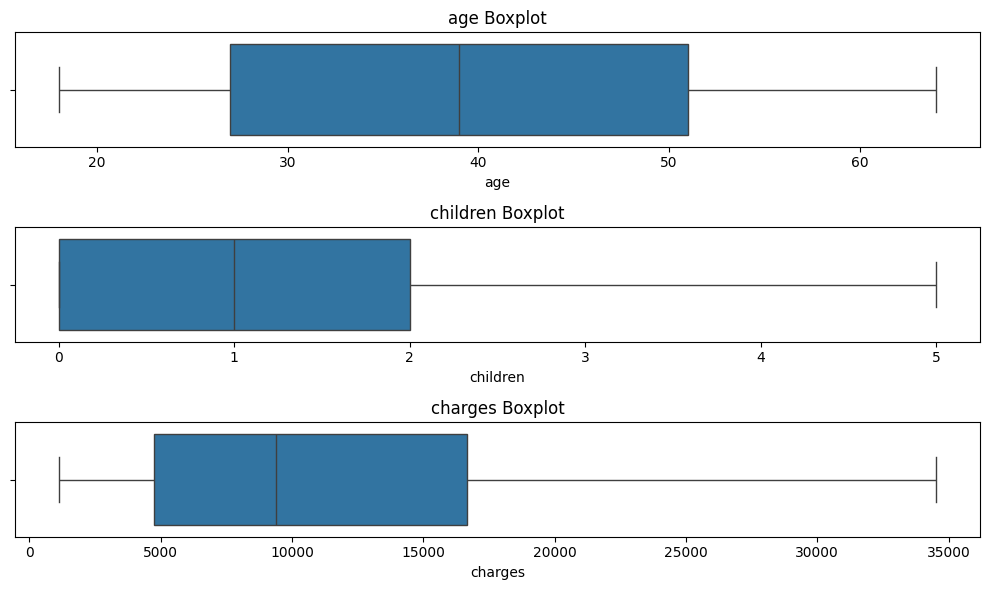

In [114]:
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, len(num_cols) * 2))  


for i, col in enumerate(num_cols, 1): 
    plt.subplot(len(num_cols), 1, i) 
    sns.boxplot(x=df[col], orient="h")  
    plt.title(f"{col} Boxplot")

plt.tight_layout() 
plt.show()

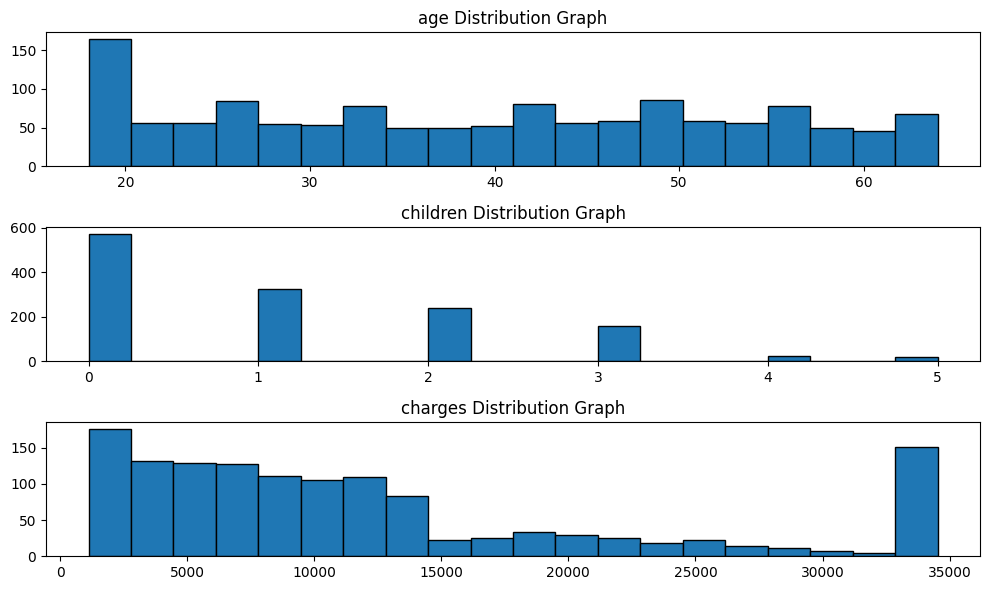

In [115]:
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, len(num_cols) * 2))
for i, col in enumerate(num_cols, 1):  
    plt.subplot(len(num_cols), 1, i)  
    plt.hist(df[col], edgecolor="black", bins=20) 
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()  
plt.show()

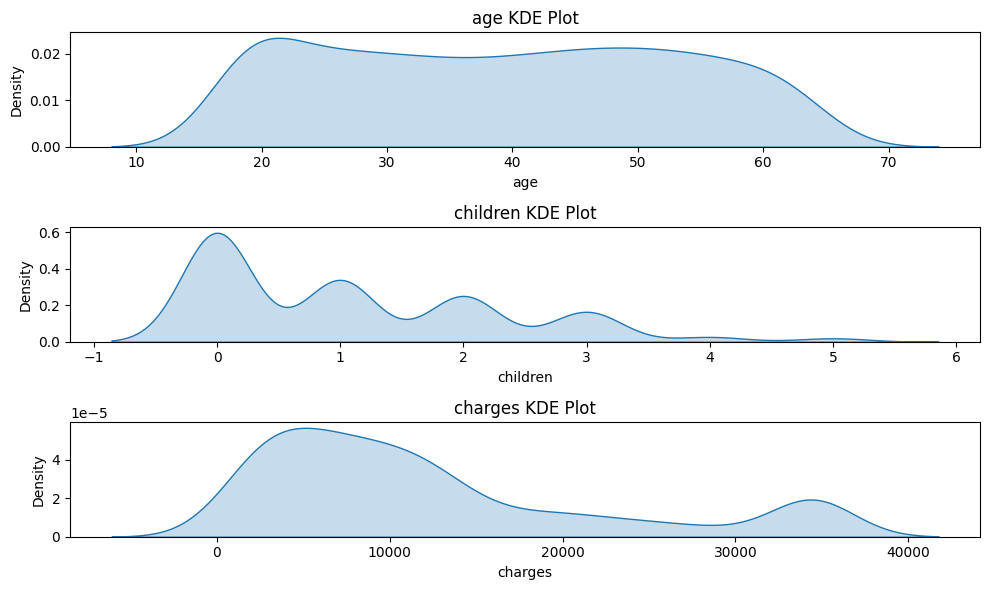

In [116]:
# Select numerical columns
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, len(num_cols) * 2))

for i, col in enumerate(num_cols, 1):  
    plt.subplot(len(num_cols), 1, i)  
    sns.kdeplot(df[col], shade=True)  
    plt.title(f"{col} KDE Plot")
plt.tight_layout()  
plt.show()

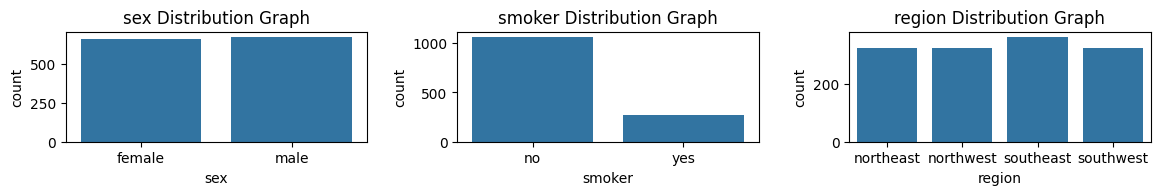

In [117]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

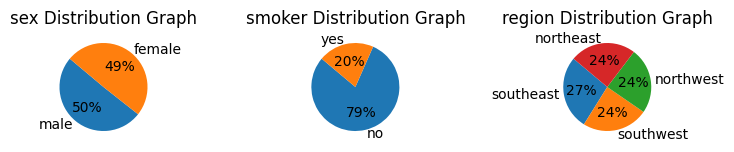

In [118]:
# Pie Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

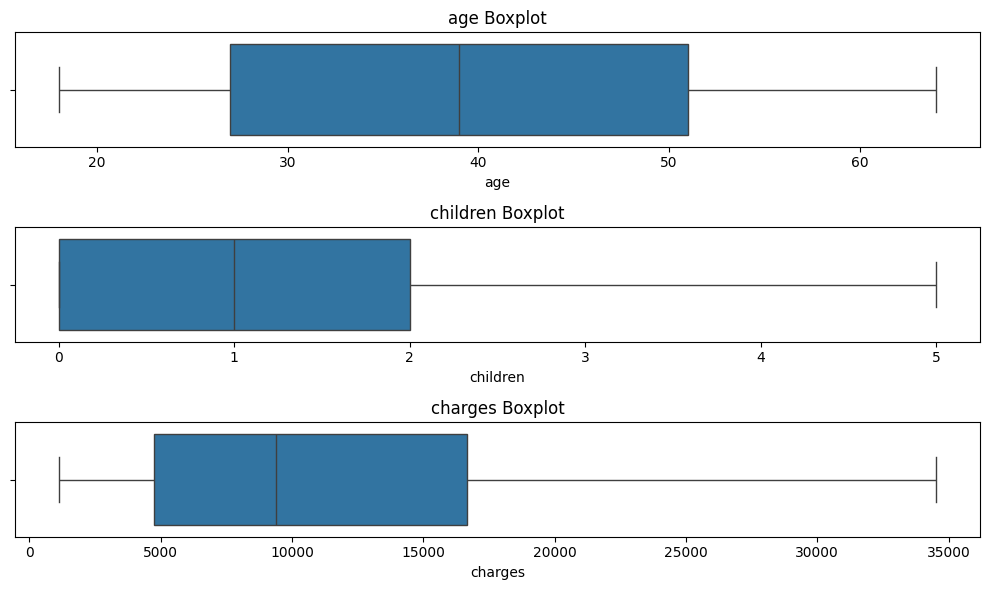

In [119]:
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, len(num_cols) * 2))

for i, col in enumerate(num_cols, 1): 
    plt.subplot(len(num_cols), 1, i) 
    sns.boxplot(x=df[col], orient="h")  
    plt.title(f"{col} Boxplot")

plt.tight_layout()  
plt.show()

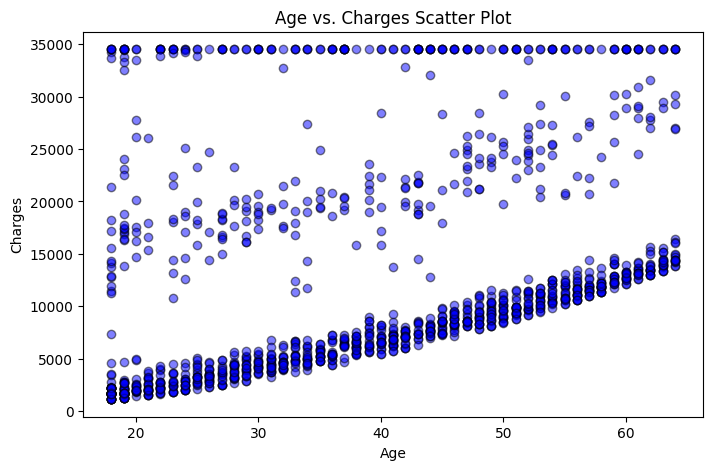

In [120]:
plt.figure(figsize=(8, 5))

plt.scatter(df["age"], df["charges"], alpha=0.5, color="blue", edgecolors="black")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs. Charges Scatter Plot")

plt.show()

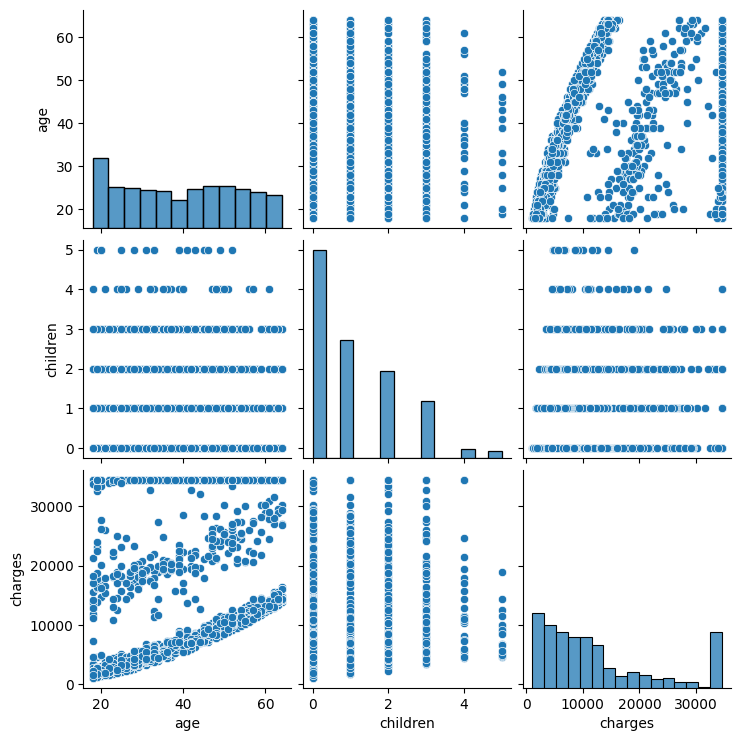

In [130]:
#Pair Plot
sns.pairplot(df)

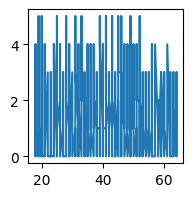

In [121]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["age"], sorted_df["children"])
plt.show()

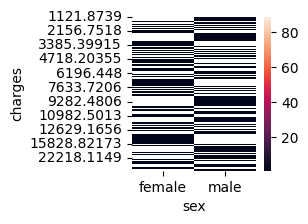

In [122]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="charges", columns="sex", values="age", aggfunc=len)
sns.heatmap(agg)
plt.show()

In [123]:
X = df.drop("sex", axis=1)
y = df[["sex"]]

In [125]:
X

,age,children,smoker,region,charges
0,0.021739,0.0,yes,southwest,0.471907
1,0.000000,0.2,no,southeast,0.018073
2,0.217391,0.6,no,southeast,0.099620
3,0.326087,0.0,no,northwest,0.624574
4,0.304348,0.0,no,northwest,0.082178
...,...,...,...,...,...
1333,0.695652,0.6,no,northwest,0.283768
1334,0.000000,0.0,no,northeast,0.032455
1335,0.000000,0.0,no,southeast,0.015207
1336,0.065217,0.0,no,southwest,0.026527


In [126]:
y

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [124]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])
X


,age,children,smoker,region,charges
0,0.021739,0.0,yes,southwest,0.471907
1,0.000000,0.2,no,southeast,0.018073
2,0.217391,0.6,no,southeast,0.099620
3,0.326087,0.0,no,northwest,0.624574
4,0.304348,0.0,no,northwest,0.082178
...,...,...,...,...,...
1333,0.695652,0.6,no,northwest,0.283768
1334,0.000000,0.0,no,northeast,0.032455
1335,0.000000,0.0,no,southeast,0.015207
1336,0.065217,0.0,no,southwest,0.026527
